In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = '/home/lumpsum/caffe/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

ImportError: No module named 'skimage'

In [2]:
print(sys.path)

['/home/lumpsum/caffe/python', '', '/home/lumpsum/Downloads/caffe/python', '/home/lumpsum/Desktop/Data Science/Scriptie', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/lumpsum/.ipython']


In [3]:
model_root = '/home/lumpsum/Desktop/Data Science/Scriptie/cnn_age_gender_models_and_data.0.0.2/'

In [4]:
mean_filename=model_root+'mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

In [5]:
age_net_pretrained=model_root+'age_net.caffemodel'
age_net_model_file=model_root+'deploy_age.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [6]:
gender_net_pretrained=model_root+'gender_net.caffemodel'
gender_net_model_file=model_root+'deploy_gender.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))


In [7]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

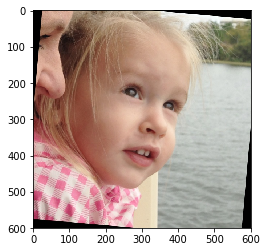

In [8]:
example_image = model_root+'example_image.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [9]:
prediction = age_net.predict([input_image]) 

print ('predicted age:', age_list[prediction[0].argmax()])

predicted age: (0, 2)


In [10]:
prediction = gender_net.predict([input_image]) 

print ('predicted gender:', gender_list[prediction[0].argmax()])

predicted gender: Female


In [11]:
def predict_age_gender(image):
    crawled_image = model_root+image
    input_image = caffe.io.load_image(crawled_image)
    _ = plt.imshow(input_image)
    
    prediction = age_net.predict([input_image]) 
    print ('predicted age:', age_list[prediction[0].argmax()])
    
    prediction = gender_net.predict([input_image]) 
    print ('predicted gender:', gender_list[prediction[0].argmax()])

predicted age: (48, 53)
predicted gender: Male


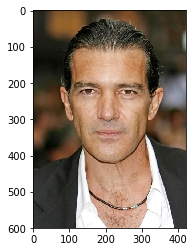

In [12]:
predict_age_gender('crawled_image.jpg')

predicted age: (25, 32)
predicted gender: Female


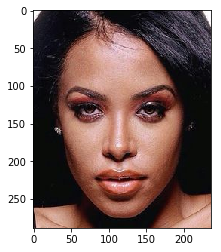

In [13]:
predict_age_gender('crawled_image2.jpg')

predicted age: (15, 20)
predicted gender: Female


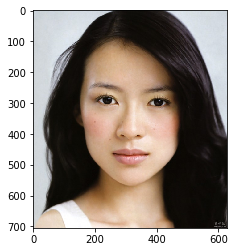

In [14]:
predict_age_gender('crawled_image3.jpg')

predicted age: (25, 32)
predicted gender: Male


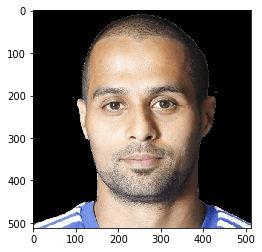

In [15]:
predict_age_gender('crawled_image4.jpg')

predicted age: (25, 32)
predicted gender: Male


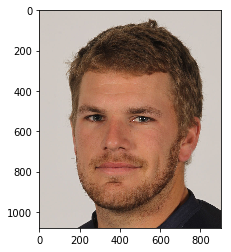

In [16]:
predict_age_gender('crawled_image5.jpg')